# Project 8: Star Wars Survey

In [2]:
import pandas as pd
star_wars = pd.read_csv("Downloads/star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The unnamed columns seem to repeat the previous question on each films

## Cleaning and Mapping Yes/No Columns

In [7]:
yes_no = {"Yes": True,"No": False}

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64

## Cleaning and Mapping Checkbox Columns

In [11]:
import numpy as np
map_dict = {"Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(map_dict)

In [12]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"})

In [13]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

In [15]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"})
star_wars.iloc[:,9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


## Finding the Highest-Ranked Movie

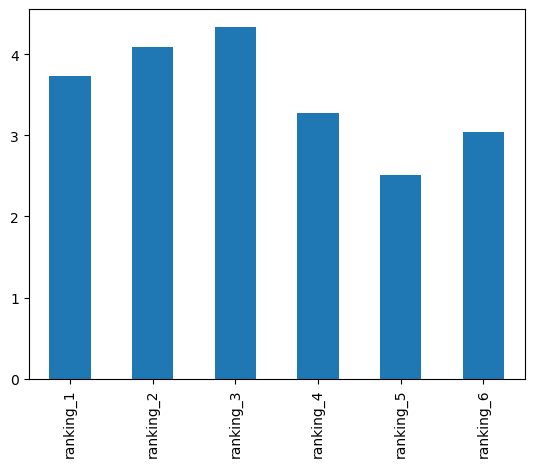

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
star_wars[star_wars.columns[9:15]].mean().plot.bar()
plt.show()

Episode 5 seems to have the best ranking, while episode 3 have the lowest ones

## Finding the Most Viewed Movie

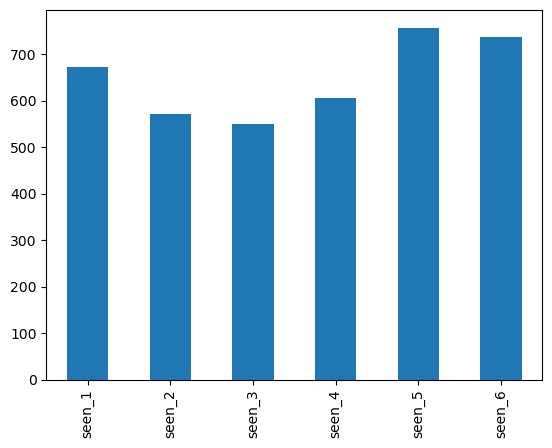

In [21]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()
plt.show()

Combined with the ranking plot, the movie with better ranks have been seen viewed than the lower ranks

## Exploring the Data by Binary Segments

In [24]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

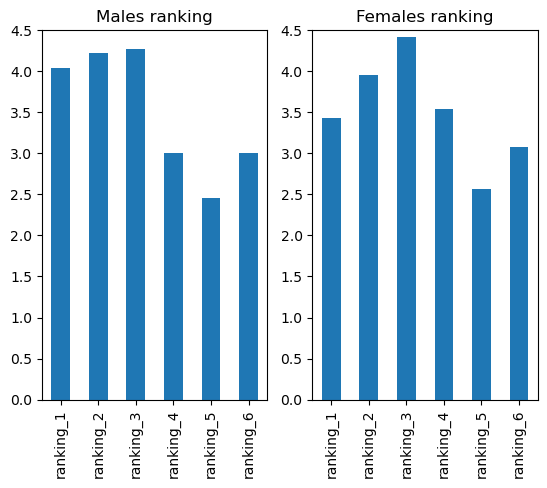

In [25]:
plt.subplot(1,2,1)
males[males.columns[9:15]].mean().plot.bar()
plt.ylim(0,4.5)
plt.title('Males ranking')
plt.subplot(1,2,2)
females[females.columns[9:15]].mean().plot.bar()
plt.ylim(0,4.5)
plt.title('Females ranking')
plt.show()

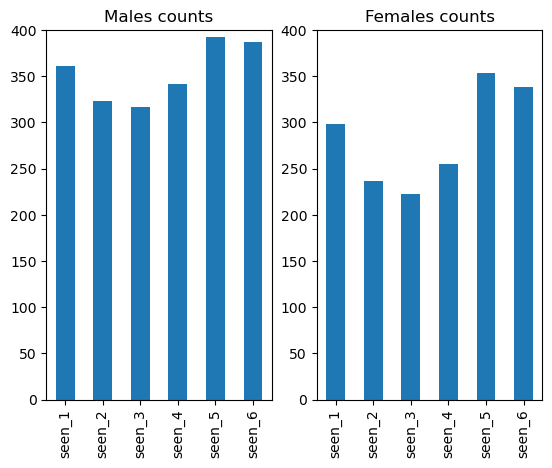

In [26]:
plt.subplot(1,2,1)
males[males.columns[3:9]].sum().plot.bar()
plt.ylim(0,400)
plt.title('Males counts')
plt.subplot(1,2,2)
females[females.columns[3:9]].sum().plot.bar()
plt.ylim(0,400)
plt.title('Females counts')
plt.show()

## Further analyzing

In [28]:
star_wars[star_wars.columns[15:29]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 14 columns):
 #   Column                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                          --------------  ----- 
 0   Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.  829 non-null    object
 1   Unnamed: 16                                                                                                     831 non-null    object
 2   Unnamed: 17                                                                                                     831 non-null    object
 3   Unnamed: 18                                                                                                     823 non-null    object
 4   Unnamed: 19                                     

In [29]:
count_df=star_wars[star_wars.columns[15:29]].apply(pd.Series.value_counts)
count_df.rename(columns={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Unnamed: 15'},inplace=True)
count_df

,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
Neither favorably nor unfavorably (neutral),44,38,48,135,43,213,84,236,248,79,57,164,207,51
Somewhat favorably,151,219,210,269,159,143,171,223,153,229,185,130,183,144
Somewhat unfavorably,8,13,12,83,8,68,102,63,96,23,10,102,58,8
Unfamiliar (N/A),15,6,8,52,17,156,10,148,132,15,10,109,164,10
Very favorably,610,552,547,245,591,110,310,142,138,474,562,112,168,605
Very unfavorably,1,3,6,39,7,124,149,8,45,7,6,204,34,8


In [30]:
count_df_1=count_df.transpose()
count_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Unnamed: 15 to Unnamed: 28
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Neither favorably nor unfavorably (neutral)  14 non-null     int64
 1   Somewhat favorably                           14 non-null     int64
 2   Somewhat unfavorably                         14 non-null     int64
 3   Unfamiliar (N/A)                             14 non-null     int64
 4   Very favorably                               14 non-null     int64
 5   Very unfavorably                             14 non-null     int64
dtypes: int64(6)
memory usage: 1.3+ KB


In [31]:
count_df_1['sum']=count_df_1.sum(axis=1)
count_df_1

,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat unfavorably,Unfamiliar (N/A),Very favorably,Very unfavorably,sum
Unnamed: 15,44,151,8,15,610,1,829
Unnamed: 16,38,219,13,6,552,3,831
Unnamed: 17,48,210,12,8,547,6,831
Unnamed: 18,135,269,83,52,245,39,823
Unnamed: 19,43,159,8,17,591,7,825
Unnamed: 20,213,143,68,156,110,124,814
Unnamed: 21,84,171,102,10,310,149,826
Unnamed: 22,236,223,63,148,142,8,820
Unnamed: 23,248,153,96,132,138,45,812
Unnamed: 24,79,229,23,15,474,7,827


In [32]:
count_df_1['Favorable']=(count_df_1['Very favorably']+count_df_1['Somewhat favorably'])/count_df_1['sum']*100
count_df_1['Neutral']=count_df_1['Neither favorably nor unfavorably (neutral)']/count_df_1['sum']*100
count_df_1['Unfavorable']=(count_df_1['Very unfavorably']+count_df_1['Somewhat unfavorably'])/count_df_1['sum']*100
count_df_1['Unfamiliar']=count_df_1['Unfamiliar (N/A)']/count_df_1['sum']*100
count_df_1

,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat unfavorably,Unfamiliar (N/A),Very favorably,Very unfavorably,sum,Favorable,Neutral,Unfavorable,Unfamiliar
Unnamed: 15,44,151,8,15,610,1,829,91.797346,5.307600,1.085645,1.809409
Unnamed: 16,38,219,13,6,552,3,831,92.779783,4.572804,1.925391,0.722022
Unnamed: 17,48,210,12,8,547,6,831,91.095066,5.776173,2.166065,0.962696
Unnamed: 18,135,269,83,52,245,39,823,62.454435,16.403402,14.823815,6.318348
Unnamed: 19,43,159,8,17,591,7,825,90.909091,5.212121,1.818182,2.060606
Unnamed: 20,213,143,68,156,110,124,814,31.081081,26.167076,23.587224,19.164619
Unnamed: 21,84,171,102,10,310,149,826,58.232446,10.169492,30.387409,1.210654
Unnamed: 22,236,223,63,148,142,8,820,44.512195,28.780488,8.658537,18.048780
Unnamed: 23,248,153,96,132,138,45,812,35.837438,30.541872,17.364532,16.256158
Unnamed: 24,79,229,23,15,474,7,827,85.006046,9.552600,3.627570,1.813785


In [33]:
count_df_2=count_df_1.iloc[:,-4:]
count_df_2

,Favorable,Neutral,Unfavorable,Unfamiliar
Unnamed: 15,91.797346,5.307600,1.085645,1.809409
Unnamed: 16,92.779783,4.572804,1.925391,0.722022
Unnamed: 17,91.095066,5.776173,2.166065,0.962696
Unnamed: 18,62.454435,16.403402,14.823815,6.318348
Unnamed: 19,90.909091,5.212121,1.818182,2.060606
Unnamed: 20,31.081081,26.167076,23.587224,19.164619
Unnamed: 21,58.232446,10.169492,30.387409,1.210654
Unnamed: 22,44.512195,28.780488,8.658537,18.048780
Unnamed: 23,35.837438,30.541872,17.364532,16.256158
Unnamed: 24,85.006046,9.552600,3.627570,1.813785


In [34]:
df = count_df_2.sort_values(by='Favorable',ascending=False)
df

,Favorable,Neutral,Unfavorable,Unfamiliar
Unnamed: 16,92.779783,4.572804,1.925391,0.722022
Unnamed: 15,91.797346,5.307600,1.085645,1.809409
Unnamed: 17,91.095066,5.776173,2.166065,0.962696
Unnamed: 19,90.909091,5.212121,1.818182,2.060606
Unnamed: 28,90.677966,6.174334,1.937046,1.210654
Unnamed: 25,90.000000,6.867470,1.927711,1.204819
Unnamed: 24,85.006046,9.552600,3.627570,1.813785
Unnamed: 18,62.454435,16.403402,14.823815,6.318348
Unnamed: 21,58.232446,10.169492,30.387409,1.210654
Unnamed: 22,44.512195,28.780488,8.658537,18.048780


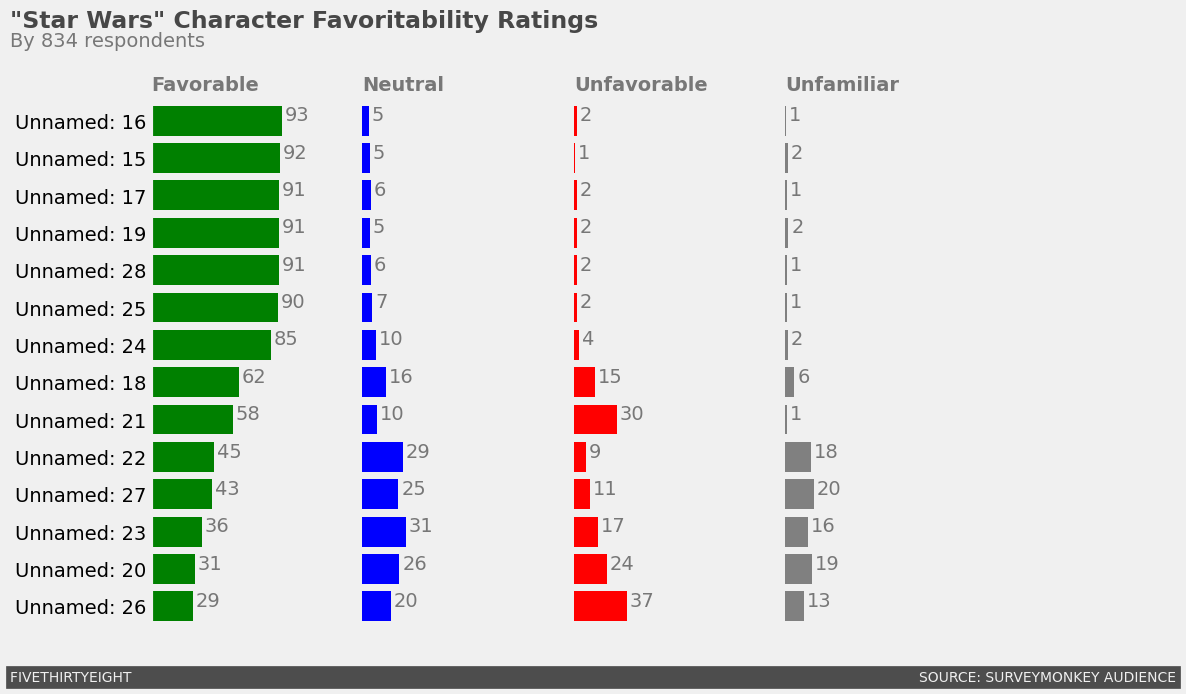

In [35]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 7))
ax.barh(df.index, df['Favorable'],color='green',linewidth=1)
plt.gca().invert_yaxis()
ax.barh(df.index,df['Neutral'],left=150,color='blue',linewidth=1)
ax.barh(df.index,df['Unfavorable'],left=300,color='red',linewidth=1)
ax.barh(df.index,df['Unfamiliar'],left=450,color='grey',linewidth=1)

ax.grid(False)
#ax.set_yticklabels([])
ax.set_xticklabels([])
y_coord = 0
for i in df['Favorable']:
    ax.text(i+2, y_coord, str(np.round(i).astype(int)),alpha=0.5)
    y_coord += 1

y_coord = 0
for i in df['Neutral']:
    ax.text(i+152, y_coord, str(np.round(i).astype(int)),alpha=0.5)
    y_coord += 1

y_coord = 0
for i in df['Unfavorable']:
    ax.text(i+302, y_coord, str(np.round(i).astype(int)),alpha=0.5)
    y_coord += 1

y_coord = 0
for i in df['Unfamiliar']:
    ax.text(i+452, y_coord, str(np.round(i).astype(int)),alpha=0.5)
    y_coord += 1
'''x_coords = df.index
y_coord = 0
for y_label in x_coords:
    ax.text(-100, y_coord, y_label,alpha=0.5)
    y_coord += 1'''
ax.text(0, -0.8, 'Favorable', weight='bold',alpha=0.5)
ax.text(150,-0.8, 'Neutral', weight='bold',alpha=0.5)
ax.text(300, -0.8, 'Unfavorable', weight='bold',alpha=0.5)
ax.text(450, -0.8, 'Unfamiliar', weight='bold',alpha=0.5)
ax.text(-100, 15,
        'FIVETHIRTYEIGHT' + ' '*180 + 'SOURCE: SURVEYMONKEY AUDIENCE',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        fontsize=10)
ax.text(-100, -2.5,'"Star Wars" Character Favoritability Ratings', size=17, weight='bold',alpha=0.7)
ax.text(-100, -2,'By 834 respondents',alpha=0.5)
plt.show()